In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATA_PATH = "./data/D1/tg_raw.csv"

data = pd.read_csv(DATA_PATH)
data

,SMILES,tg
0,*C*,-54.0
1,*CC(*)C,-3.0
2,*CC(*)CC,-24.1
3,*CC(*)CCC,-37.0
4,*CC(*)C(C)C,60.0
...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0


In [2]:
data["tg"].describe()

count    7174.000000
mean      141.948090
std       112.178143
min      -139.000000
25%        55.000000
50%       134.000000
75%       231.000000
max       495.000000
Name: tg, dtype: float64

In [3]:
data["SMILES"].apply(lambda x: len(x)).describe()

count    7174.000000
mean       63.467103
std        35.174694
min         3.000000
25%        35.000000
50%        59.000000
75%        85.000000
max       314.000000
Name: SMILES, dtype: float64

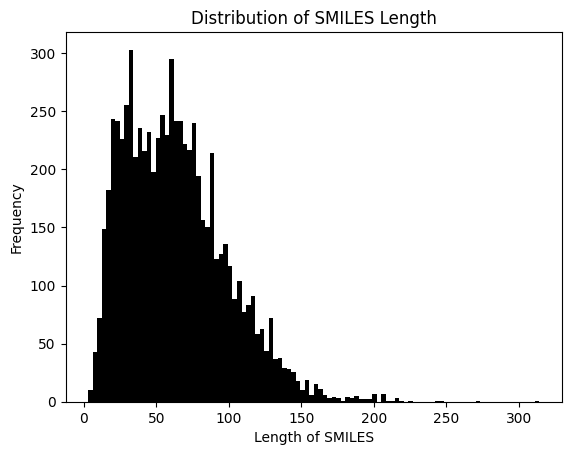

In [4]:
smiles_length = data["SMILES"].apply(lambda x: len(x))
smiles_length.hist(bins=100, color="#000")
plt.xlabel("Length of SMILES")
plt.ylabel("Frequency")
plt.title("Distribution of SMILES Length")
plt.grid(alpha=0)
plt.show()

In [5]:
data["SMILES"]

0                                                 *C*
1                                             *CC(*)C
2                                            *CC(*)CC
3                                           *CC(*)CCC
4                                         *CC(*)C(C)C
                            ...                      
7169                               *CC(*)(F)C(=O)OCCC
7170          *CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F
7171    *CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*
7172     *CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*
7173                      *CC(*)(F)C(=O)OCC(Cl)(Cl)Cl
Name: SMILES, Length: 7174, dtype: object

In [6]:
from collections import Counter


unique_chars = set()
for smiles in data["SMILES"]:
    unique_chars.update(set(smiles))

unique_chars = sorted(list(unique_chars))
print(f"There are {len(unique_chars)} unique characters in SMILES")


all_chars = "".join(data["SMILES"].dropna())
char_counts = Counter(all_chars)

# Convert to DataFrame for better visualization
char_counts_df = pd.DataFrame(char_counts.items(), columns=["Character", "Count"])
char_counts_df = char_counts_df.sort_values(by="Count", ascending=True)
char_counts_df.head()

There are 47 unique characters in SMILES


,Character,Count
46,K,1
41,L,1
45,T,1
42,d,2
44,Z,2


In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np


def encode_smiles(smiles_string):
    bitsize = 1024

    mol = Chem.MolFromSmiles(smiles_string)
    if mol is None:
        print("Invalid SMILES string.")
        return np.zeros(bitsize)

    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=bitsize)
    return np.array(fingerprint)  # No need for reshaping or OneHotEncoder

In [8]:
smiles_string = "*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*"
df = encode_smiles(smiles_string)
df

[22:51:16] DEPRECATION WARNING: please use MorganGenerator


array([0, 0, 0, ..., 0, 0, 0], shape=(1024,))

In [9]:
features_list = []
for smiles in data["SMILES"]:
    features_list.append(encode_smiles(smiles))

features = pd.DataFrame(features_list)
features.columns = [f"F{col}" for col in features.columns]
features

[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerat

[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerator
[22:51:16] DEPRECATION WARNING: please use MorganGenerat

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F1014,F1015,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
from rdkit.Chem import Descriptors


def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    return {
        "MW": Descriptors.MolWt(mol),
        "LogP": Descriptors.MolLogP(mol),
        "NumRotatableBonds": Descriptors.NumRotatableBonds(mol),
        "HBondDonors": Descriptors.NumHDonors(mol),
        "HBondAcceptors": Descriptors.NumHAcceptors(mol),
        "TPSA": Descriptors.TPSA(mol)
    }


descriptors_list = []
for smiles in data["SMILES"]:
    descriptors_list.append(compute_descriptors(smiles))

descriptors = pd.DataFrame(descriptors_list)
descriptors

,MW,LogP,NumRotatableBonds,HBondDonors,HBondAcceptors,TPSA
0,14.027,0.4608,0,0,0,0.00
1,42.081,1.3117,1,0,0,0.00
2,56.108,1.7018,2,0,0,0.00
3,70.135,2.0919,3,0,0,0.00
4,70.135,1.9478,2,0,0,0.00
...,...,...,...,...,...,...
7169,132.134,1.1223,4,0,2,26.30
7170,270.119,2.9678,2,1,1,20.23
7171,330.190,4.2912,4,1,1,20.23
7172,316.163,3.9011,3,1,1,20.23


In [11]:
for col in descriptors.columns: 
    assert "None" not in descriptors[col], "None found."

In [12]:
def get_atomic_features(smiles):
    # Convert SMILES to RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # Get atom features
    atom_features = []
    for atom in mol.GetAtoms():
        # Atom features: One-hot encoding of atom type, formal charge, hybridization, aromaticity
        atom_type_one_hot = [0] * 100  # Limit to first 100 elements
        atom_num = atom.GetAtomicNum()
        if atom_num < 100:
            atom_type_one_hot[atom_num] = 1

        formal_charge = [atom.GetFormalCharge()]
        hybridization_type = [0, 0, 0, 0, 0]  # One-hot encoding of hybridization
        hyb_type = atom.GetHybridization()
        if hyb_type == Chem.rdchem.HybridizationType.SP:
            hybridization_type[0] = 1
        elif hyb_type == Chem.rdchem.HybridizationType.SP2:
            hybridization_type[1] = 1
        elif hyb_type == Chem.rdchem.HybridizationType.SP3:
            hybridization_type[2] = 1
        elif hyb_type == Chem.rdchem.HybridizationType.SP3D:
            hybridization_type[3] = 1
        elif hyb_type == Chem.rdchem.HybridizationType.SP3D2:
            hybridization_type[4] = 1

        is_aromatic = [1 if atom.GetIsAromatic() else 0]
        degree = [atom.GetDegree()]
        num_h = [atom.GetTotalNumHs()]

        # Combine all features
        features = (
            atom_type_one_hot # 100
            + formal_charge
            + hybridization_type  # 5
            + is_aromatic
            + degree
            + num_h
        )
        atom_features.append(features)

    return pd.DataFrame(atom_features)

In [23]:
get_atomic_features("*CC(C(=O)OCC(C(C(F)(F)F)(F)F)F)*").mean(axis="rows")[-20:]

89     0.000000
90     0.000000
91     0.000000
92     0.000000
93     0.000000
94     0.000000
95     0.000000
96     0.000000
97     0.000000
98     0.000000
99     0.000000
100    0.000000
101    0.000000
102    0.176471
103    0.705882
104    0.000000
105    0.000000
106    0.000000
107    1.882353
108    0.352941
dtype: float64

In [24]:
import pandas as pd
from rdkit import Chem


def compute_molecular_stats(smiles_list):
    sizes = []

    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            sizes.append(
                {
                    "NumAtoms": mol.GetNumAtoms(),
                    "NumHeavyAtoms": mol.GetNumHeavyAtoms(),
                    "NumBonds": mol.GetNumBonds(),
                }
            )

    df = pd.DataFrame(sizes)
    return df.describe()  # Get min, max, median, etc.


# Example: Compute statistics for your dataset
df_stats = compute_molecular_stats(data["SMILES"])
df_stats

,NumAtoms,NumHeavyAtoms,NumBonds
count,7174.000000,7174.000000,7174.000000
mean,36.708810,34.695567,39.629495
std,18.879148,18.890769,21.761893
min,3.000000,1.000000,2.000000
25%,22.000000,20.000000,22.000000
50%,35.000000,33.000000,38.000000
75%,48.000000,46.000000,53.000000
max,166.000000,164.000000,181.000000


In [14]:
from tqdm import tqdm


atomic_features_list = []
for smiles in tqdm(data["SMILES"]):
    atomic_features_list.append(get_atomic_features(smiles).mean(axis="rows"))


atomic_features = pd.DataFrame(atomic_features_list)
atomic_features.columns = [f"A{col}" for col in atomic_features.columns]
atomic_features

  0%|          | 14/7174 [00:00<00:53, 134.00it/s]

100%|██████████| 7174/7174 [00:57<00:00, 124.99it/s]


,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A99,A100,A101,A102,A103,A104,A105,A106,A107,A108
0,0.666667,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1.333333,0.666667
1,0.400000,0.0,0.0,0.0,0.0,0.0,0.600000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.600000,0.0,0.0,0.0,1.600000,1.200000
2,0.333333,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1.666667,1.333333
3,0.285714,0.0,0.0,0.0,0.0,0.0,0.714286,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
4,0.285714,0.0,0.0,0.0,0.0,0.0,0.714286,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,0.181818,0.0,0.0,0.0,0.0,0.0,0.545455,0.0,0.181818,0.090909,...,0.0,0.0,0.0,0.272727,0.545455,0.0,0.0,0.0,1.818182,0.818182
7170,0.105263,0.0,0.0,0.0,0.0,0.0,0.421053,0.0,0.052632,0.421053,...,0.0,0.0,0.0,0.000000,0.894737,0.0,0.0,0.0,2.000000,0.315789
7171,0.086957,0.0,0.0,0.0,0.0,0.0,0.478261,0.0,0.043478,0.391304,...,0.0,0.0,0.0,0.000000,0.913043,0.0,0.0,0.0,2.000000,0.478261
7172,0.090909,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.045455,0.409091,...,0.0,0.0,0.0,0.000000,0.909091,0.0,0.0,0.0,2.000000,0.409091


In [15]:
features = pd.concat([features, descriptors, atomic_features], axis=1)
features

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,A99,A100,A101,A102,A103,A104,A105,A106,A107,A108
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1.333333,0.666667
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.600000,0.0,0.0,0.0,1.600000,1.200000
2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1.666667,1.333333
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.272727,0.545455,0.0,0.0,0.0,1.818182,0.818182
7170,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.894737,0.0,0.0,0.0,2.000000,0.315789
7171,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.913043,0.0,0.0,0.0,2.000000,0.478261
7172,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.909091,0.0,0.0,0.0,2.000000,0.409091


In [16]:
features.sum(axis="rows").sort_values(ascending=False)

MW                   3.429873e+06
TPSA                 5.252913e+05
NumRotatableBonds    6.751300e+04
LogP                 4.099167e+04
HBondAcceptors       3.546500e+04
                         ...     
A56                  0.000000e+00
A57                  0.000000e+00
A58                  0.000000e+00
A59                  0.000000e+00
A60                  0.000000e+00
Length: 1139, dtype: float64

In [17]:
processed_data = pd.concat([data, features], axis=1)
processed_data

,SMILES,tg,F0,F1,F2,F3,F4,F5,F6,F7,...,A99,A100,A101,A102,A103,A104,A105,A106,A107,A108
0,*C*,-54.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1.333333,0.666667
1,*CC(*)C,-3.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.600000,0.0,0.0,0.0,1.600000,1.200000
2,*CC(*)CC,-24.1,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1.666667,1.333333
3,*CC(*)CCC,-37.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
4,*CC(*)C(C)C,60.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.272727,0.545455,0.0,0.0,0.0,1.818182,0.818182
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.894737,0.0,0.0,0.0,2.000000,0.315789
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.913043,0.0,0.0,0.0,2.000000,0.478261
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.909091,0.0,0.0,0.0,2.000000,0.409091


In [18]:
processed_data = processed_data.dropna(subset=["tg"])
processed_data.reset_index(drop=True, inplace=True)
processed_data

,SMILES,tg,F0,F1,F2,F3,F4,F5,F6,F7,...,A99,A100,A101,A102,A103,A104,A105,A106,A107,A108
0,*C*,-54.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1.333333,0.666667
1,*CC(*)C,-3.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.600000,0.0,0.0,0.0,1.600000,1.200000
2,*CC(*)CC,-24.1,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1.666667,1.333333
3,*CC(*)CCC,-37.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
4,*CC(*)C(C)C,60.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.272727,0.545455,0.0,0.0,0.0,1.818182,0.818182
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.894737,0.0,0.0,0.0,2.000000,0.315789
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.913043,0.0,0.0,0.0,2.000000,0.478261
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.909091,0.0,0.0,0.0,2.000000,0.409091


In [19]:
X = processed_data.drop(columns=["SMILES", "tg"])
X

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,A99,A100,A101,A102,A103,A104,A105,A106,A107,A108
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1.333333,0.666667
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.600000,0.0,0.0,0.0,1.600000,1.200000
2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1.666667,1.333333
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.714286,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.272727,0.545455,0.0,0.0,0.0,1.818182,0.818182
7170,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.894737,0.0,0.0,0.0,2.000000,0.315789
7171,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.913043,0.0,0.0,0.0,2.000000,0.478261
7172,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.909091,0.0,0.0,0.0,2.000000,0.409091


In [20]:
y = processed_data["tg"]
y

0       -54.0
1        -3.0
2       -24.1
3       -37.0
4        60.0
        ...  
7169     62.0
7170    152.0
7171     98.0
7172    118.0
7173    127.0
Name: tg, Length: 7174, dtype: float64

R2 Score: 0.8847255610039428
Mean Squared Error: 1423.7689822381299
Root Mean Squared Error: 37.73286342484665


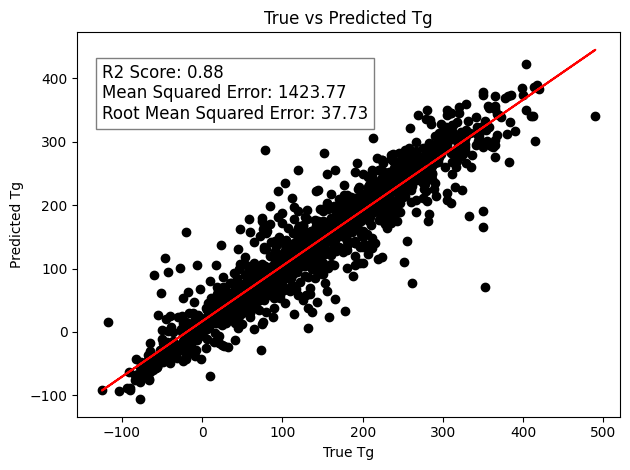

In [22]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

plt.scatter(y_test, y_pred, color="black")
plt.xlabel("True Tg")
plt.ylabel("Predicted Tg")
plt.title("True vs Predicted Tg")

# regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red")

# Define the text content
metrics_text = (
    f"R2 Score: {r2:.2f}\n"
    f"Mean Squared Error: {mse:.2f}\n"
    f"Root Mean Squared Error: {rmse:.2f}"
)

# Automatically position it in the top-left corner
plt.text(
    min(y_test),
    max(y_pred),  # Dynamically set top-left position
    metrics_text,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="left",
    bbox=dict(facecolor="white", alpha=0.5),  # Background for readability
)


plt.grid(alpha=0)
plt.tight_layout()
plt.show()

Fingerprint + descriptor + atomic features
```
R2 Score: 0.8854571990668465
Mean Squared Error: 1413.4857332741017
Root Mean Squared Error: 37.596352659188916
```


Fingerprint + descriptor
```
R2 Score: 0.8878134086875137
Mean Squared Error: 1384.4095394296726
Root Mean Squared Error: 37.20765431238138
```

Fingerprint only.
```
R2 Score: 0.8845638297943829
Mean Squared Error: 1424.51012512488
Root Mean Squared Error: 37.74268306738248
```

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, n_jobs=-1)

# Perform 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=24)
r2_scores = cross_val_score(
    model,
    X,
    y,
    scoring="r2",
    cv=cv,
    n_jobs=1,
    verbose=2,
)
mse_scores = -cross_val_score(
    model,
    X,
    y,
    scoring="neg_mean_squared_error",
    cv=cv,
    n_jobs=1,
    verbose=2,
)
rmse_scores = np.sqrt(mse_scores)

# Compute mean and std for stability
r2_mean, r2_std = r2_scores.mean(), r2_scores.std()
mse_mean, mse_std = mse_scores.mean(), mse_scores.std()
rmse_mean, rmse_std = rmse_scores.mean(), rmse_scores.std()

print(f"R2 Score: {r2_mean:.2f} ± {r2_std:.2f}")
print(f"Mean Squared Error: {mse_mean:.2f} ± {mse_std:.2f}")
print(f"Root Mean Squared Error: {rmse_mean:.2f} ± {rmse_std:.2f}")

[CV] END .................................................... total time=   6.8s
[CV] END .................................................... total time=   5.8s
[CV] END .................................................... total time=   7.5s
[CV] END .................................................... total time=   4.8s
[CV] END .................................................... total time=   5.3s
[CV] END .................................................... total time=   4.6s
[CV] END .................................................... total time=   4.0s
[CV] END .................................................... total time=   5.3s
[CV] END .................................................... total time=   4.9s
[CV] END .................................................... total time=   4.5s
[CV] END .................................................... total time=   3.9s
[CV] END .................................................... total time=   4.2s
[CV] END ...................

In [ ]:
```
R2 Score: 0.89 ± 0.01
Mean Squared Error: 1433.33 ± 109.99
Root Mean Squared Error: 37.83 ± 1.46
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 10, 12],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [0.1, 1, 10],
}

model = XGBRegressor(n_jobs=-1)

cv = KFold(n_splits=10, shuffle=True, random_state=24)
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    scoring="r2",
    cv=cv,
    verbose=2,
    random_state=24,
    n_jobs=1,
)

random_search.fit(X, y)
best_model = random_search.best_estimator_

print(f"Best Model: {best_model}")

r2_scores = cross_val_score(best_model, X, y, scoring="r2", cv=cv, n_jobs=-1)
mse_scores = -cross_val_score(
    best_model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1
)
rmse_scores = np.sqrt(mse_scores)

r2_mean, r2_std = r2_scores.mean(), r2_scores.std()
mse_mean, mse_std = mse_scores.mean(), mse_scores.std()
rmse_mean, rmse_std = rmse_scores.mean(), rmse_scores.std()

print(f"R2 Score: {r2_mean:.2f} ± {r2_std:.2f}")
print(f"Mean Squared Error: {mse_mean:.2f} ± {mse_std:.2f}")
print(f"Root Mean Squared Error: {rmse_mean:.2f} ± {rmse_std:.2f}")

best_model.fit(X, y)
y_pred = best_model.predict(X)

plt.scatter(y, y_pred, color="black", alpha=0.7)
plt.xlabel("True Tg")
plt.ylabel("Predicted Tg")
plt.title("True vs Predicted Tg")

z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)
plt.plot(y, p(y), color="red")

metrics_text = (
    f"R2 Score: {r2_mean:.2f} ± {r2_std:.2f}\n"
    f"Mean Squared Error: {mse_mean:.2f} ± {mse_std:.2f}\n"
    f"Root Mean Squared Error: {rmse_mean:.2f} ± {rmse_std:.2f}"
)

plt.text(
    min(y),
    max(y_pred),
    metrics_text,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="left",
    bbox=dict(facecolor="white", alpha=0.5),
)

plt.grid(alpha=0)
plt.tight_layout()
plt.show()

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  18.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  16.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  15.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  17.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  15.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  18.0s
[CV] END cols

In [34]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize XGBoost Regressor
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Define hyperparameter search space
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 10, 12],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [0.1, 1, 10],
}

# Randomized Search
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    cv=10,
    scoring="r2",
    n_jobs=6,
    verbose=1,
    n_iter=5,  # Change to a higher value for a better search
    random_state=42,
)

# Fit the model
random_search.fit(X, y)

# Get best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best R^2 Score: 0.5557


In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

rf = RandomForestRegressor()

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    cv=10,
    scoring="r2",
    n_jobs=4,
    verbose=1,
    n_iter=1,
)

random_search.fit(X, y)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best R^2 Score: 0.4355


In [ ]:
cv_scores = cross_val_score(
    random_search.best_estimator_,
    X,
    y,
    cv=10,
    scoring="r2",
    n_jobs=-2,
)
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
print(cv_results_df)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


# Generating a random dataset for demonstration
np.random.seed(24)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [2:30:19<00:49, 49.04s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5319
[LightGBM] [Info] Number of data points in the train set: 5739, number of used features: 1773
[LightGBM] [Info] Start training from score 142.200306


100%|██████████| 42/42 [2:30:24<00:00, 214.87s/it]


In [15]:
models.sort_values(by="R-Squared", ascending=False).head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,1.04,0.79,51.38,160.65
LGBMRegressor,1.04,0.78,52.60,5.11
HistGradientBoostingRegressor,1.04,0.78,52.60,58.74
XGBRegressor,1.04,0.77,52.89,9.24
BaggingRegressor,1.04,0.76,54.09,26.73
LassoCV,1.05,0.74,56.49,968.92
ElasticNetCV,1.05,0.74,56.75,568.50
BayesianRidge,1.05,0.73,57.80,210.63
ElasticNet,1.05,0.73,57.81,7.54
